In [1]:
from __future__ import absolute_import,division,print_function
import numpy as np
import tensorflow as tf
import tensorflow_datasets as tfds
import math 
import matplotlib.pyplot as plt
import tqdm
import tqdm.auto 
tqdm.tqdm=tqdm.auto.tqdm

In [2]:
dataset,metadata=tfds.load("fashion_mnist",as_supervised=True,with_info=True)
train_dataset=dataset['train']
test_dataset=dataset['test']

In [3]:
class_names=['T-shirt/top','Trouser','Pullover','Dress','Coat','Sandal','Shirt','Sneaker','Bag','Ankle boot']

In [4]:
def  normalize(images,labels):
    images=tf.cast(images,tf.float32)
    images/=255
    return images,labels

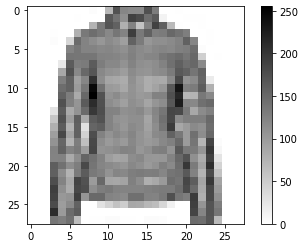

In [5]:
for image,label in test_dataset.take(1):
    break
image=image.numpy().reshape((28,28))
plt.figure()
plt.imshow(image,cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

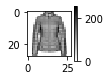

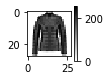

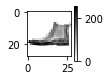

In [6]:
for image,label in test_dataset.take(3):
    image=image.numpy().reshape((28,28))
    plt.figure(figsize=(1,1))
    plt.imshow(image,cmap=plt.cm.binary)
    plt.colorbar()
    plt.grid(False)
    plt.show()

In [7]:
model=tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28,1)),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(128,activation=tf.nn.relu),
    tf.keras.layers.Dense(10,activation=tf.nn.softmax),

])

In [8]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

In [9]:

BATCH_SIZE=32
num_train_examples=metadata.splits['train'].num_examples
num_test_examples=metadata.splits['test'].num_examples
train_dataset=train_dataset.repeat().shuffle(num_train_examples).batch(BATCH_SIZE)
test_dataset=test_dataset.batch(BATCH_SIZE)

In [10]:
model.fit(train_dataset,epochs=5,steps_per_epoch=math.ceil(num_train_examples/BATCH_SIZE))

Train for 1875 steps
Epoch 1/5
1875/1875 [==============================] - 9s 5ms/step - loss: 1.9208 - accuracy: 0.7466
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.6533 - accuracy: 0.7919
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.5606 - accuracy: 0.8162
Epoch 4/5
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4990 - accuracy: 0.8326
Epoch 5/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.4681 - accuracy: 0.8403


In [11]:
test_loss,test_accuracy=model.evaluate(test_dataset,steps=math.ceil(num_test_examples/BATCH_SIZE))
test_accuracy

313/313 [==============================] - 1s 4ms/step - loss: 0.4918 - accuracy: 0.8401


0.8401

In [12]:
for test_images,test_labels in test_dataset.take(1):
    test_images=test_images.numpy()
    test_labels=test_labels.numpy()    
    predictions=model.predict(test_images)

In [13]:
predictions.shape

(32, 10)

In [14]:
predictions[0]

array([2.2621035e-04, 3.3824096e-04, 1.9062629e-01, 3.0505275e-03,
       7.3595196e-01, 1.4723970e-06, 6.8431117e-02, 1.5165666e-06,
       1.3717166e-03, 1.0031669e-06], dtype=float32)

In [ ]:
np.argmax(predictions[0])

In [ ]:
test_labels[0]

In [ ]:
img=test_images[4]
print(img.shape)
img=np.array([img])
prediction=model.predict(img)
print(prediction)
index=np.argmax(prediction)
print(class_names[index])

data = test_images[4]
from matplotlib import pyplot as plt
plt.imshow(data.reshape(28,-28), interpolation='nearest',cmap=plt.cm.binary)
plt.show()